# Data Frame Description

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Loading the dataet

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#checking shape
df.shape

(1470, 35)

Observation:
Total Rows:1470,Total Columns:35

In [4]:
#checking the datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:

Categorical Data:

1.Attrition  

2.BusinessTravel

3.Department

4.EducationField

5.Gender

6.JobRole

7.MaritalStatus

8.Over18

9.OverTime

Numerical Data:

1.Age

2.DailyRate

3.DistanceFromHome

4.Education

5.EmployeeCount

6.EmployeeNumber

7.EnvironmentSatisfaction

8.HourlyRate

9.JobInvolvement

10.JobLevel

11.JobSatisfaction

12.MonthlyIncome

13.MonthlyRate

14.NumCompaniesWorked

15.PercentSalaryHike

16.PerformanceRating

17.RelationshipSatisfaction 

18.StandardHours

19.StockOptionLevel 

20.TotalWorkingYears

21.TrainingTimesLastYear

22.WorkLifeBalance

23.YearsAtCompany

24.YearsInCurrentRole

25.YearsSinceLastPromotion

26.YearsWithCurrManager

In [5]:
# Checking null values in the dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

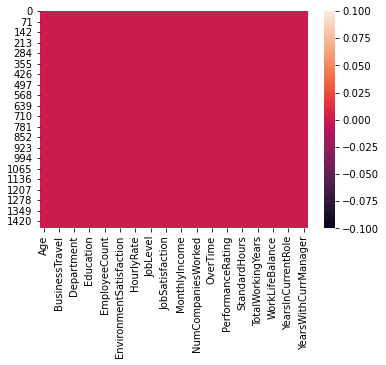

In [6]:
#data visualisation
sns.heatmap(df.isnull())

Observation:
No Null Values present.

# Exploratory Data Analysis:

In [7]:
#Removing Unnecessary columns in the dataset
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber','StockOptionLevel'],axis=1,inplace=True)

In [8]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,17,3,3,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,15,3,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,20,4,2,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,14,3,4,17,3,2,9,6,0,8


# Exploratory Data Analysis

# Univariate Ananlysis(Numerical Data):

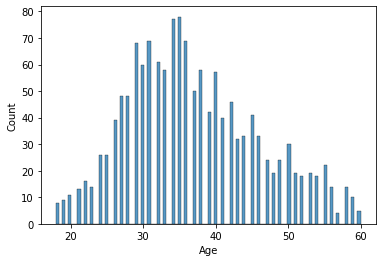

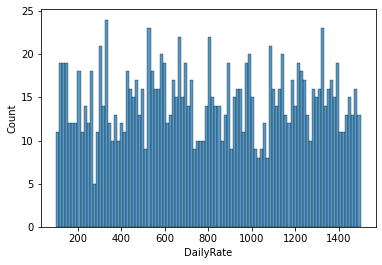

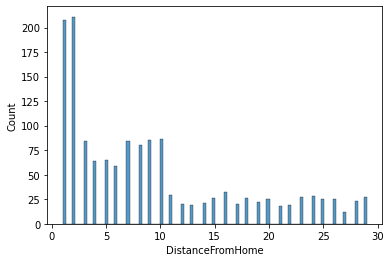

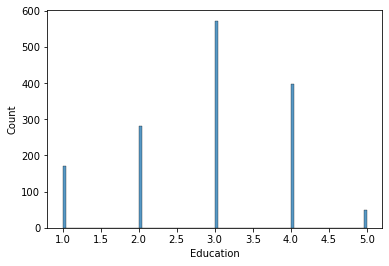

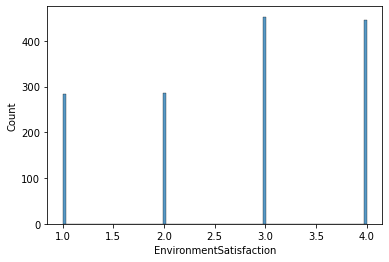

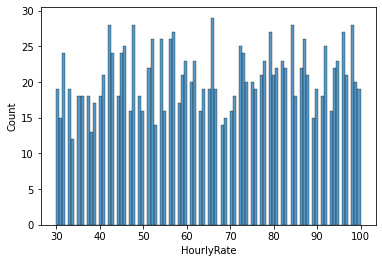

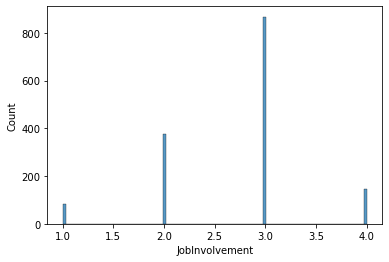

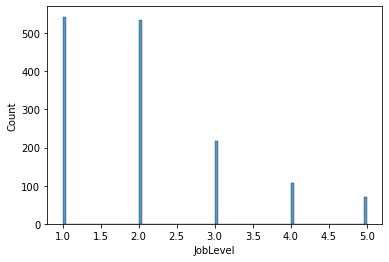

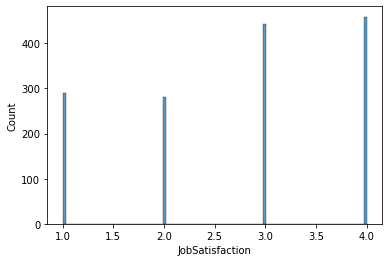

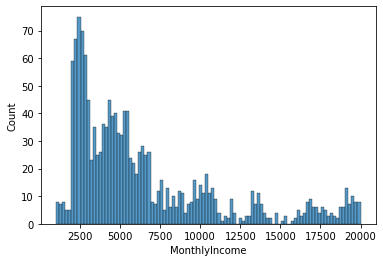

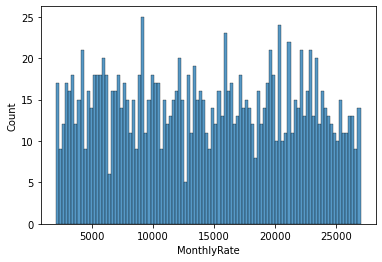

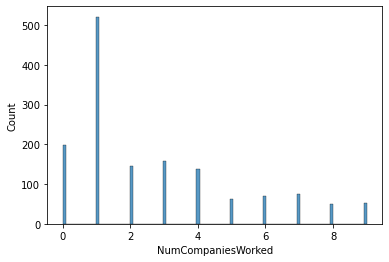

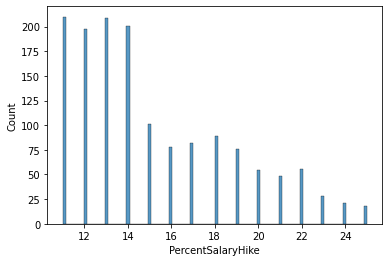

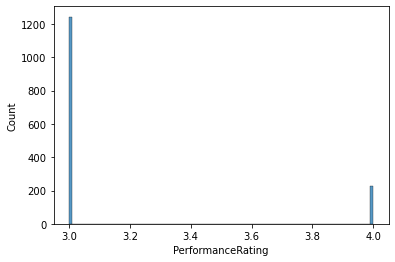

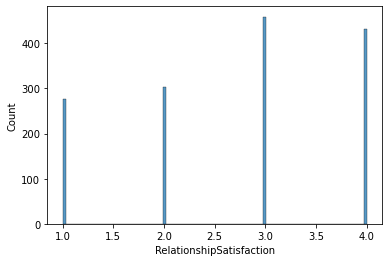

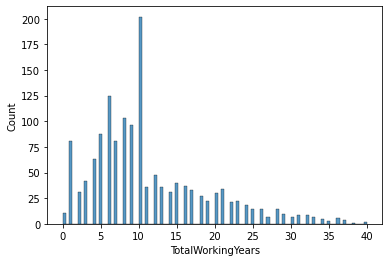

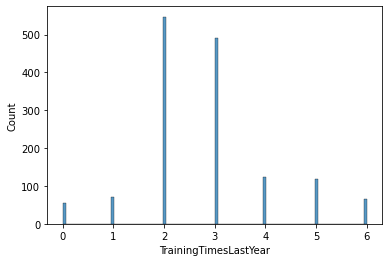

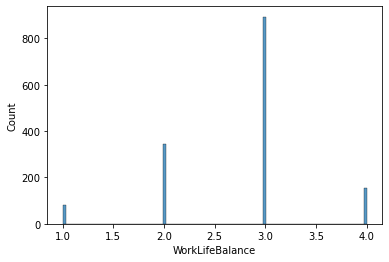

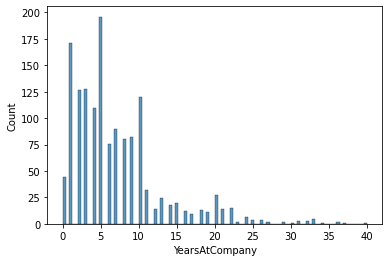

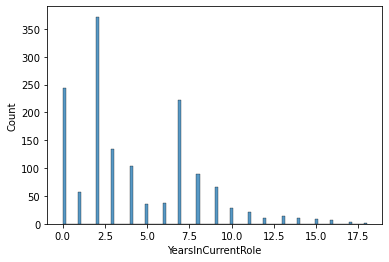

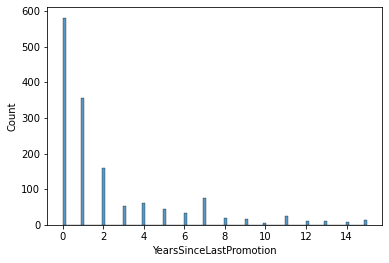

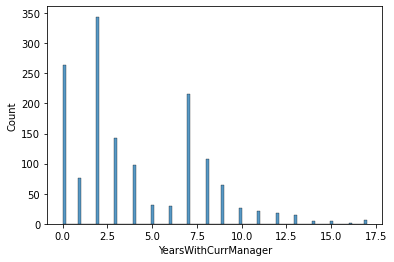

In [9]:
num=['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in num:
    sns.histplot(data=df,x=i,bins=100)
    plt.show()

Observation:
    
    
1.Maximum employees are within the age group of 30-40.

2.There is no clear image about the daily rates,hourly rates and monthly rates.

3.There are more employees having home nearby.

4.Maximum employees are working within salary range of 2500 to 7500.

5.Maximum employees are getting promoted within a year or two.

6.There are almost 200 employees who have spent nearly 5years in the company.

7.There are around 350 employees who have spent almost 2.5years with the current manager.

8.There are arount 350 employees who have spent almost 2.5years working in the same role.

9.Around 500 employees have worked for only one company.

# Univariate Ananlysis(Categorical Data):

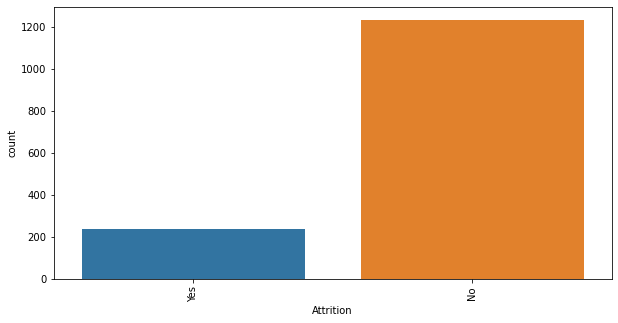

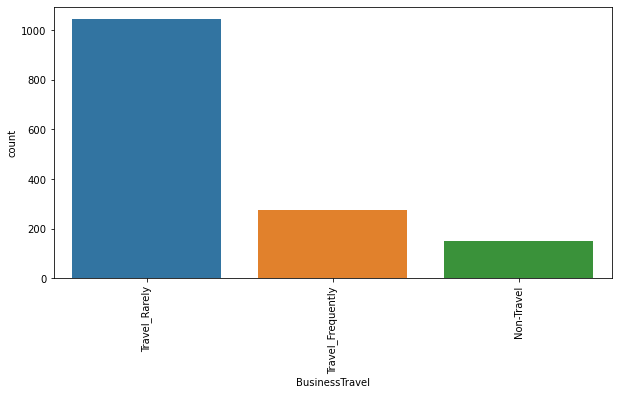

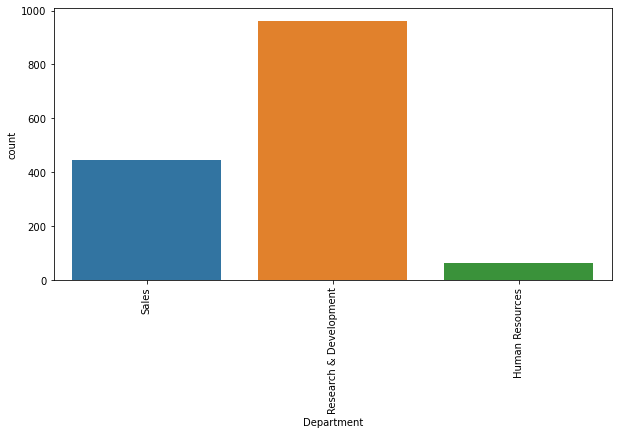

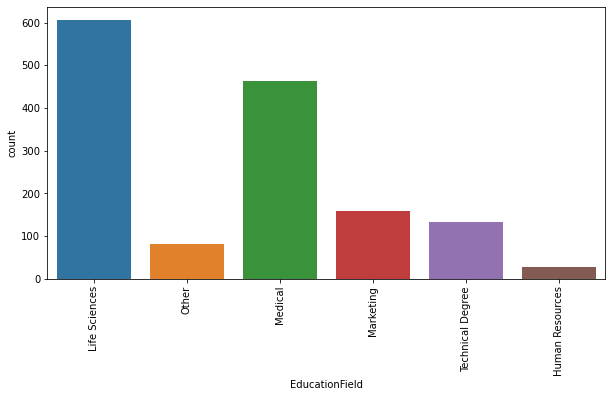

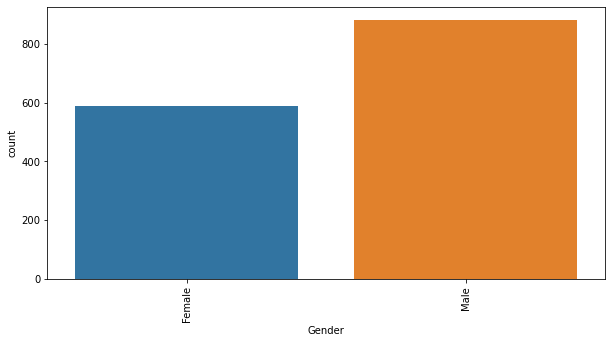

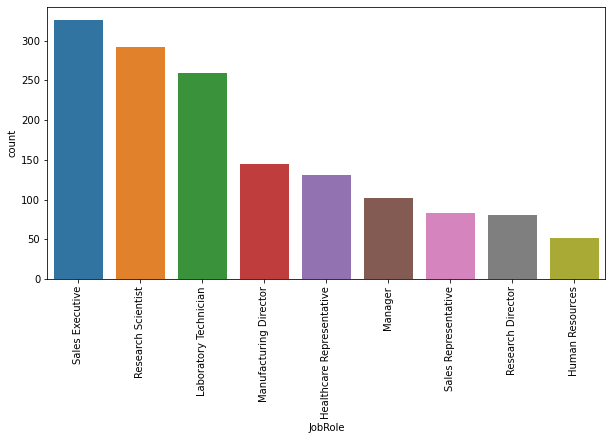

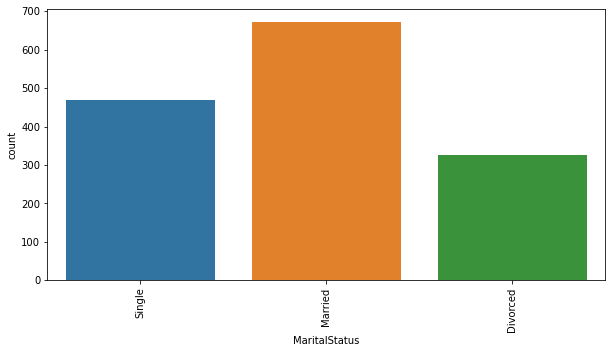

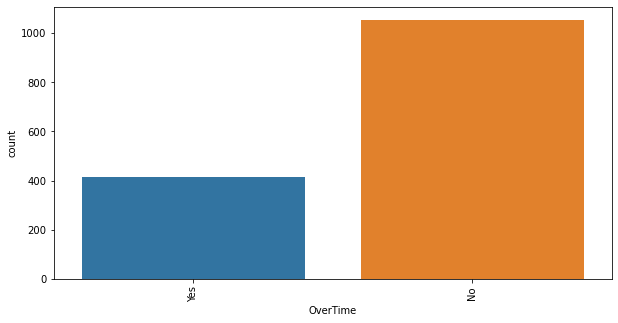

In [10]:
cat=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

Observation:
1.Few of the employees left their job due to some reasons whereas other most of the employees preferred to continue their job at the company.

2.The count of employees who travel rarely is maximum.

3.People asscociated with R&D is maximum compared to others.

4.The frequency of employee having degree as life sciences is highest.

5.There are more male employees than female.

6.The frequency of employee working in jobrole as sales executive is highest.

7.Most of the employees are married.

# Multivariate Analysis:

Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.0,8.0
Travel_Frequently,75.1,24.9
Travel_Rarely,85.0,15.0


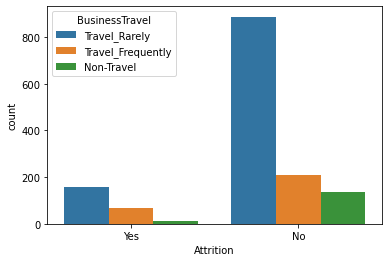

In [11]:
sns.countplot(x='Attrition',hue='BusinessTravel',data=df)
pd.crosstab(df['BusinessTravel'],df['Attrition']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation:
Attrition rate for people who travel frequently is higher

Attrition,No,Yes
OverTime,,
No,89.6,10.4
Yes,69.5,30.5


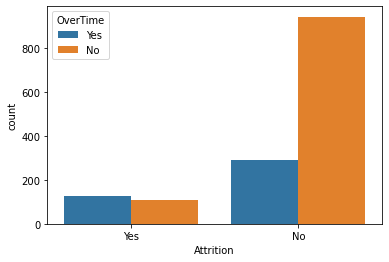

In [13]:
sns.countplot(x='Attrition',hue='OverTime',data=df)
pd.crosstab(df['OverTime'],df['Attrition']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation: Attrition rate of employees who work in overtime is higher

Attrition,No,Yes
Department,,
Human Resources,81.0,19.0
Research & Development,86.2,13.8
Sales,79.4,20.6


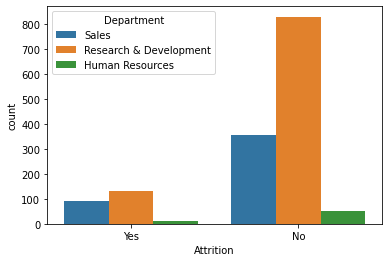

In [14]:
sns.countplot(x='Attrition',hue='Department',data=df)
pd.crosstab(df['Department'],df['Attrition']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation:
Attrition rate for people in sales department is higher

Attrition,No,Yes
Gender,,
Female,85.2,14.8
Male,83.0,17.0


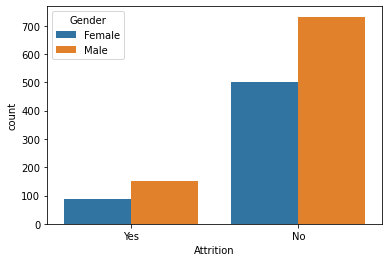

In [15]:
sns.countplot(x='Attrition',hue='Gender',data=df)
pd.crosstab(df['Gender'],df['Attrition']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation:
Male employee tends to leave the job more than female.

Attrition,No,Yes
EducationField,,
Human Resources,74.1,25.9
Life Sciences,85.3,14.7
Marketing,78.0,22.0
Medical,86.4,13.6
Other,86.6,13.4
Technical Degree,75.8,24.2


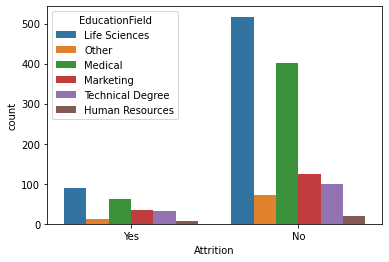

In [16]:
sns.countplot(x='Attrition',hue='EducationField',data=df)
pd.crosstab(df['EducationField'],df['Attrition']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation:
Employee having educational field as Human Resources,Life SCiences and Technical degree have higher possibility to leave the job.

<AxesSubplot:xlabel='Department', ylabel='MonthlyIncome'>

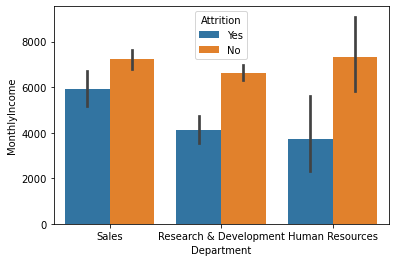

In [17]:
sns.barplot(x='Department',y='MonthlyIncome',hue='Attrition',data=df)

Observation:
The attrition rate for sales department is highest among the rest but monthly income of Human Resources department  is highest.

<AxesSubplot:xlabel='Department', ylabel='MonthlyRate'>

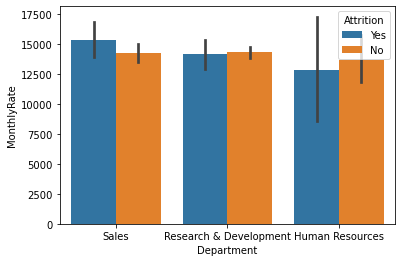

In [18]:
sns.barplot(x='Department',y='MonthlyRate',hue='Attrition',data=df)

Observation:
Monthly rate of Sales department is more.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

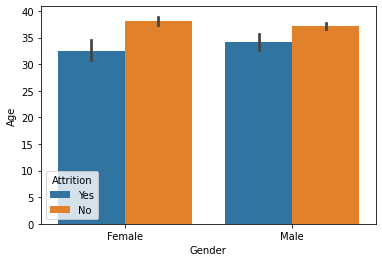

In [19]:
sns.barplot(x='Gender',y='Age',hue='Attrition',data=df)

Observation:
Male and Female having age greater than 35 have higher attrition rate.

<AxesSubplot:xlabel='EducationField', ylabel='MonthlyIncome'>

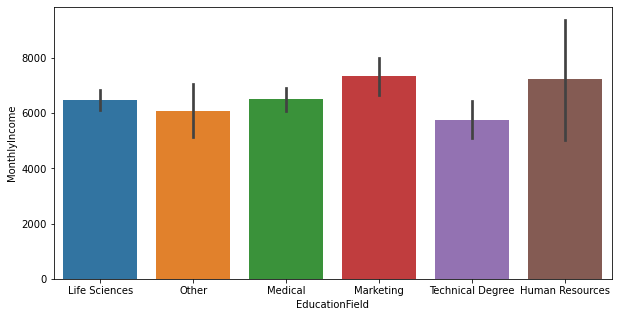

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='EducationField',y='MonthlyIncome',data=df)

Observation:
Monthly income is highest for Marketing followed by Human Resources.

# Data Set Description

In [21]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


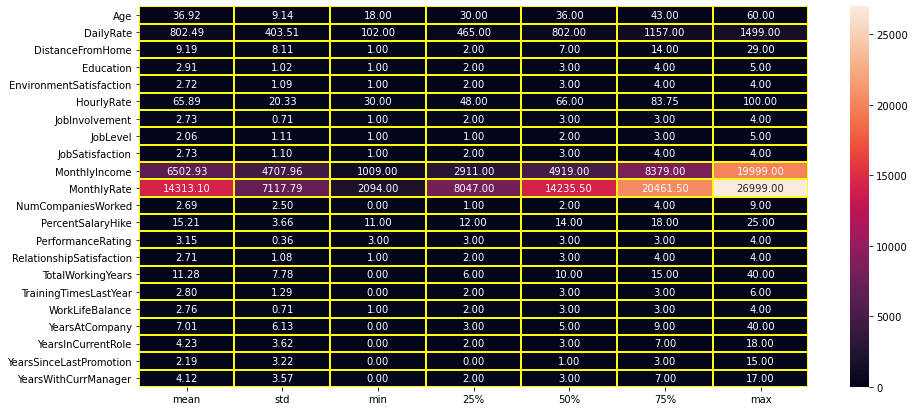

In [22]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Observation:

1.There is a huge diffrence between 75% and max of MonthlyIncome and MonthlyRate indicating presence of outliers.

2.Most of the features have mean and median almost equal indicating data are kindof normally distributed.

3.High value of std for daily rate indicates datas are highly spreaded.

# Converting String data to Numerical Data

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,11,3,1,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,23,4,4,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,15,3,2,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,11,3,3,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,12,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,17,3,3,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,15,3,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,20,4,2,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,14,3,4,17,3,2,9,6,0,8


# Correlation

In [25]:
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
DistanceFromHome            0.077924
M

<AxesSubplot:>

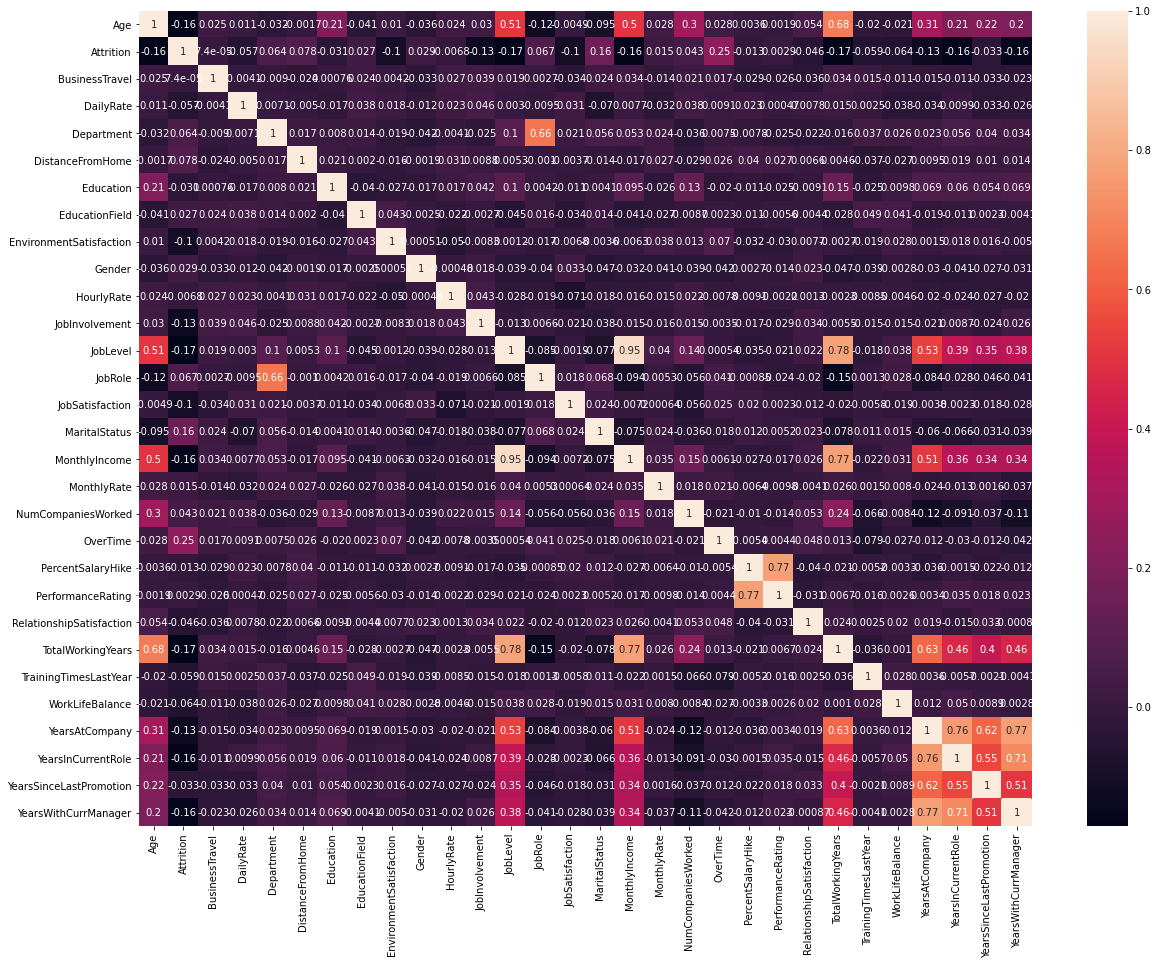

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

Observation:

1.Highest Correlation: Overtime

2.Lowest Correlation: TotalWorkingYears

# Checking Skewness:

In [27]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

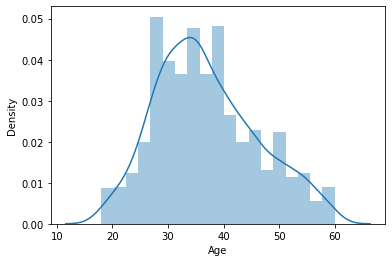

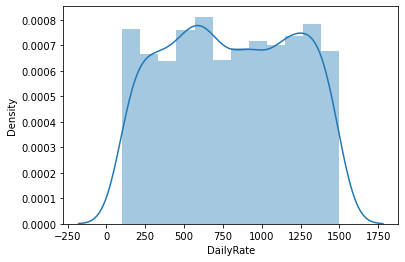

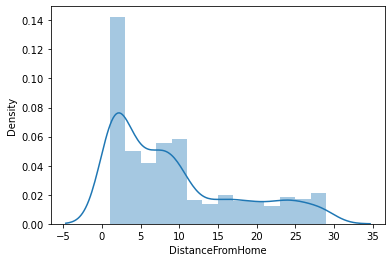

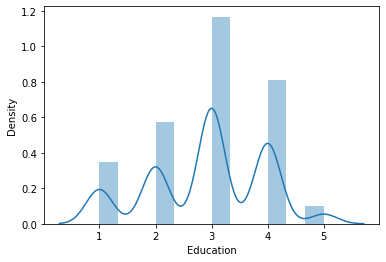

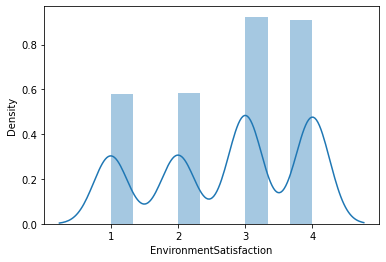

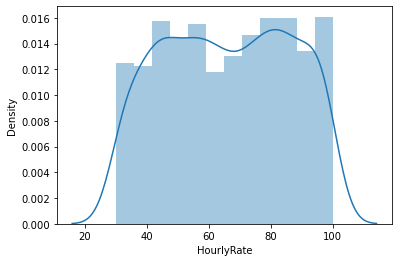

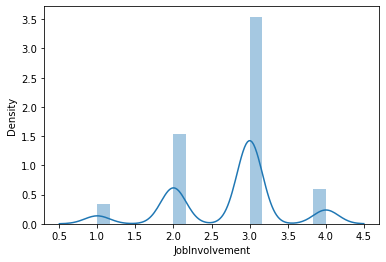

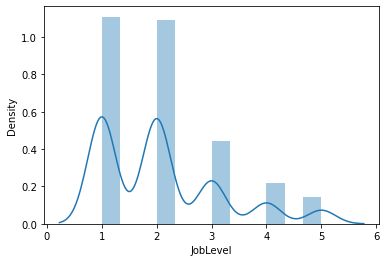

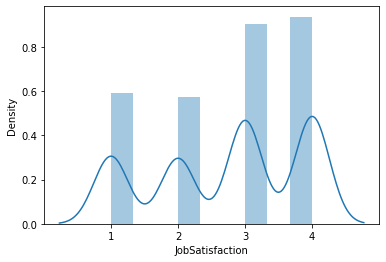

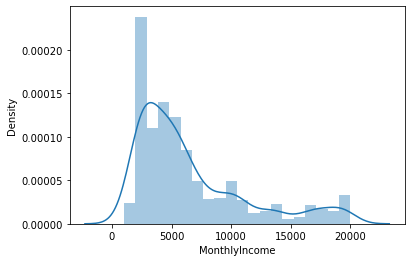

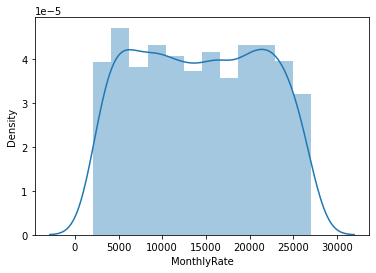

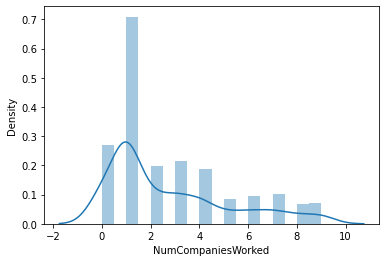

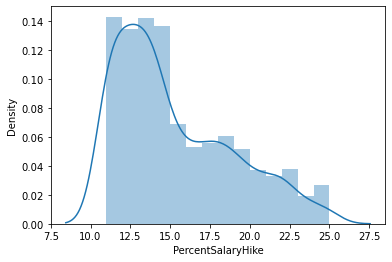

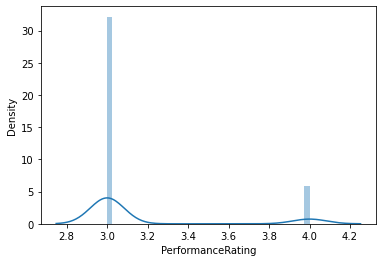

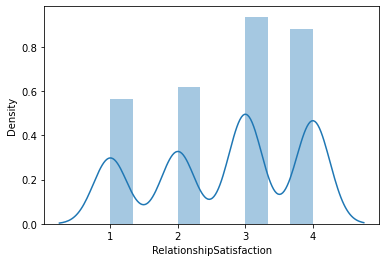

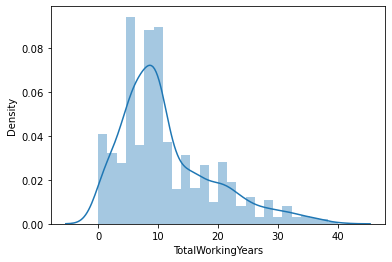

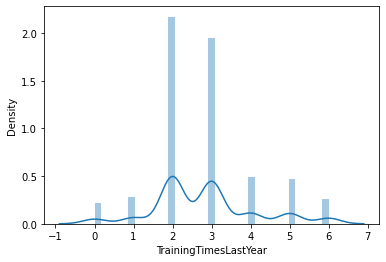

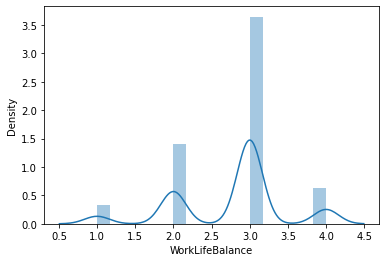

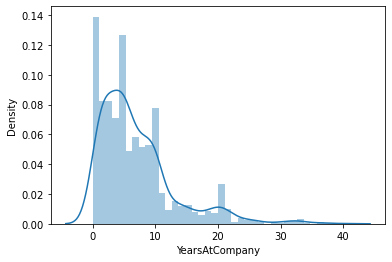

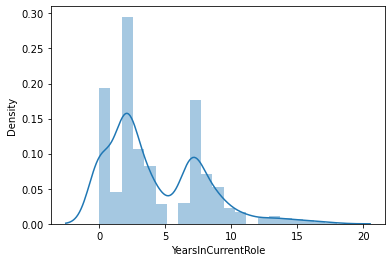

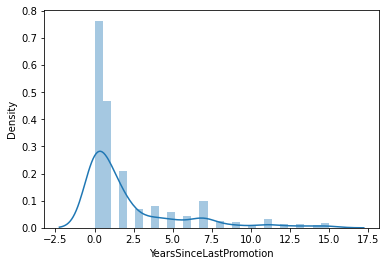

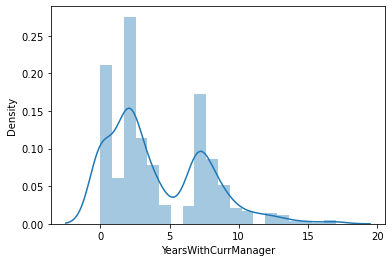

In [28]:
num=['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in num:
    sns.distplot(df[i])
    plt.show()

Taking +/- 0.5 as the range of skewness.We can see from the histogram some features are postively skewed while some are negatively skewed.

# Outliers Checking:

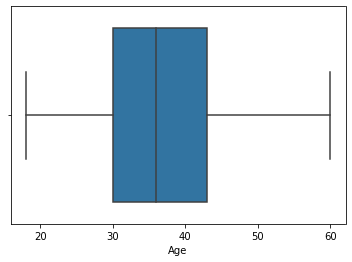

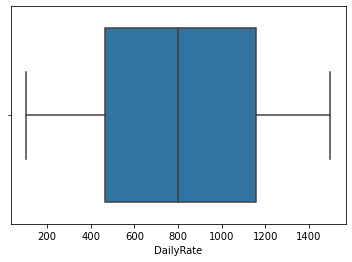

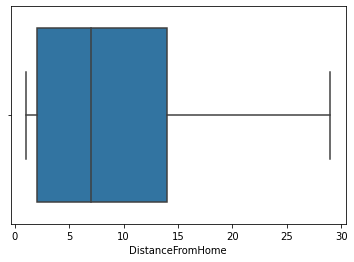

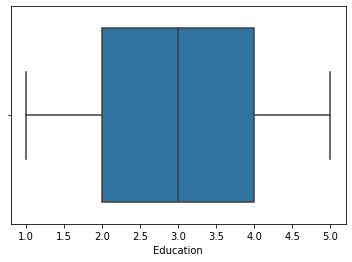

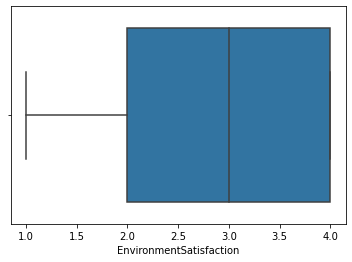

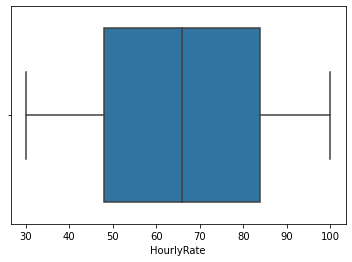

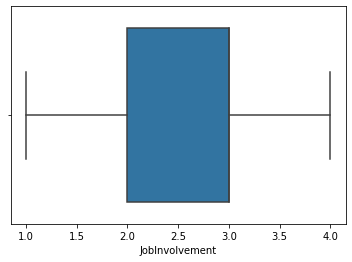

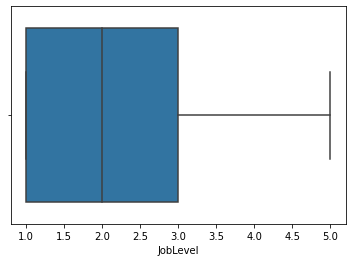

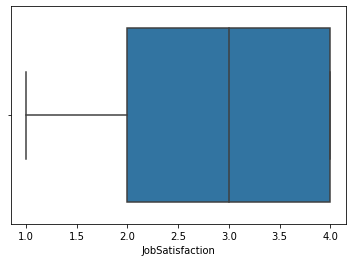

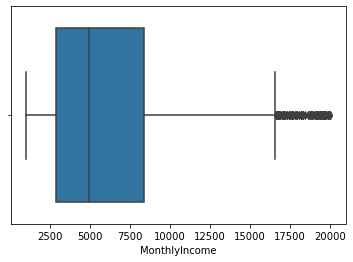

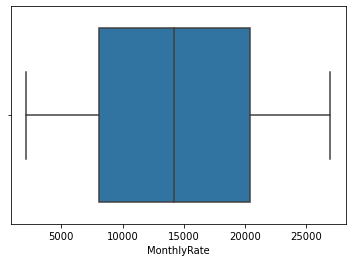

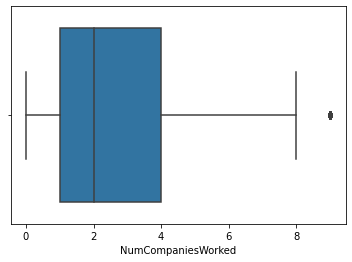

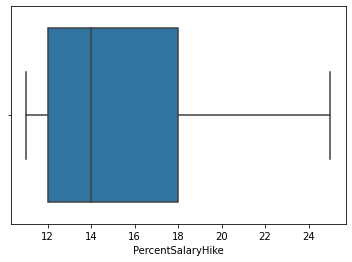

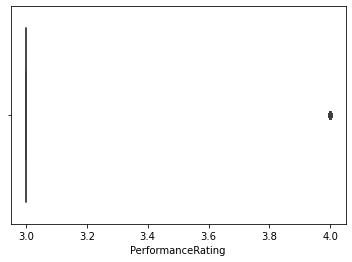

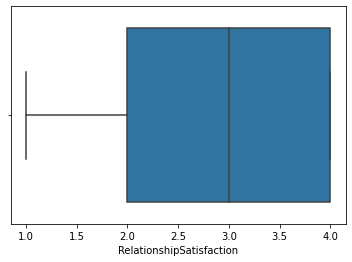

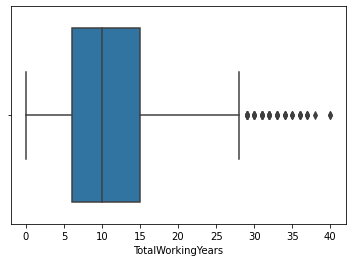

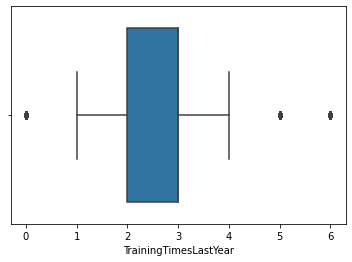

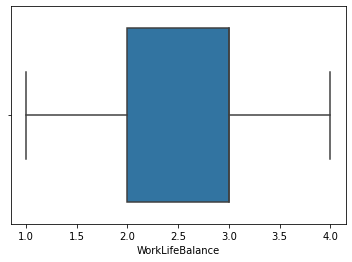

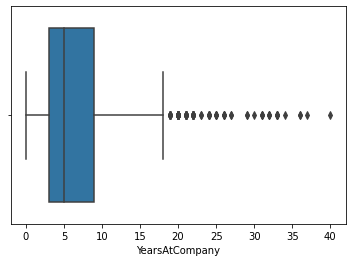

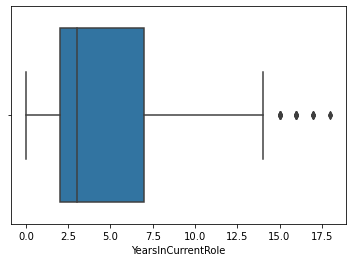

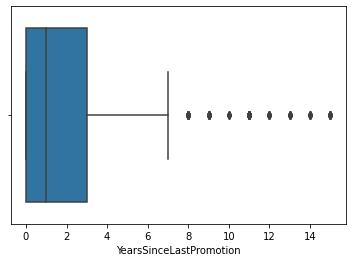

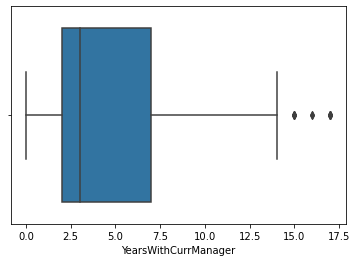

In [29]:
num=['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for i in num:
    sns.boxplot(df[i])
    plt.show()

Observation:
Outliers are present in the data set and needs further treatment.

# DATA PREPROCESSING:

# REMOVING OUTLIERS:

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print(z)

[[0.4463504  2.28090588 0.59004834 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 0.4384223  0.91319439 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   2.28090588 0.59004834 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 0.4384223  0.59004834 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.4384223  0.91319439 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.4384223  0.59004834 ... 0.33939374 0.36871529 0.59522723]]


In [31]:
threshold = 3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64), array([ 0,  1,  2, ..., 27, 28, 29], dtype=int64))


In [32]:
df_new = df[(z<3).all(axis = 1)]
print(df_new.shape)

(1387, 30)


In [33]:
df.shape[0]

1470

In [34]:
df_new.shape[0]

1387

In [35]:
data_loss=(1470-1387)/1470*100
data_loss

5.646258503401361

Since only 5.6% data is lost due to ouliers removal we can consider to remove outliers

In [36]:
df=df_new

# Skewness Treatment:

In [37]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [38]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182974, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182974, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [39]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182974, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182974, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [40]:
#checking if target is balanced or not.
y.value_counts()

0.0    1158
1.0     229
Name: Attrition, dtype: int64

# Balancing the dataset

In [41]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [42]:
y.value_counts()

0.0    1158
1.0    1158
Name: Attrition, dtype: int64

# Model Building:

In [43]:
# Since our outcome has only two variable we will use binary classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 106 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 120 The model performs very well
Training Accuracy Score is: 80.2
Testing Accuracy Score is: 80.2


At random state 243 The model performs very well
Training Accuracy Score is: 80.2
Testing Accuracy Score is: 80.2


At random state 356 The model performs very well
Training Accuracy Score is: 80.2
Testing Accuracy Score is: 80.2


At random state 398 The model performs very well
Training Accuracy Score is: 80.6
Testing Accuracy Score is: 80.6


At random state 417 The model performs very well
Training Accuracy Score is: 80.8
Testing Accuracy Score is: 80.8


At random state 546 The model performs very well
Training Accuracy Score is: 80.2
Testing Accuracy Score is: 80.2


At random state 551 The model performs very well
Training Accuracy Score is: 80.4
Testing Accuracy Score is: 80.4


At random state 590 The model performs very well
Training Accuracy Score

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression Model

In [45]:
#selecting random state=180
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=180,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 81.2
Testing Accuracy Score is: 77.8


# CROSS VALIDATION OF THE MODEL

In [46]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7931778929188256
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 3 the cv score is 0.7927461139896373
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 4 the cv score is 0.8000863557858376
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 5 the cv score is 0.7987944067922841
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 6 the cv score is 0.7974956822107081
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 7 the cv score is 0.7975124573311884
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 8 the cv score is 0.7983444696336953
training score : 0.8115550755939525
testing score : 0.7780172413793104


At crossfold= 9 the cv score is 0.7974927692147853
training score : 0.8115550755939525
testing score : 0.7780172413793104




In [47]:
#selecting cv=8 as it is very close to testing score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=8)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.8599137931034483
the cv score is 0.8592814103328958
[[196  45]
 [ 20 203]]
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.86       241
         1.0       0.82      0.91      0.86       223

    accuracy                           0.86       464
   macro avg       0.86      0.86      0.86       464
weighted avg       0.86      0.86      0.86       464



KNeighborsClassifier()
accuracy score: 0.7844827586206896
the cv score is 0.8078525832239589
[[144  97]
 [  3 220]]
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74       241
         1.0       0.69      0.99      0.81       223

    accuracy                           0.78       464
   macro avg       0.84      0.79      0.78       464
weighted avg       0.84      0.78      0.78       464



SVC()
accuracy score: 0.9094827586206896
the cv score is 0.9197008113590264
[[213  28]
 [ 14 209]]
         

# Ensemble Techniques

# Ramdom Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.9331896551724138
the cv score is 0.9409169550173011
[[228  13]
 [ 18 205]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       241
         1.0       0.94      0.92      0.93       223

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464



# Adaboost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()     
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,adpred))
cv_score=cross_val_score(ad,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

accuracy score: 0.8922413793103449
the cv score is 0.8977389333015153
[[215  26]
 [ 24 199]]
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       241
         1.0       0.88      0.89      0.89       223

    accuracy                           0.89       464
   macro avg       0.89      0.89      0.89       464
weighted avg       0.89      0.89      0.89       464



# GradientBoosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=200)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.9224137931034483
the cv score is 0.9133098675575706
[[228  13]
 [ 23 200]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       241
         1.0       0.94      0.90      0.92       223

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464



# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=8)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.916336057749672
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 250}


In [53]:
gb=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.9202586206896551
the cv score is 0.9133098675575706
[[227  14]
 [ 23 200]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92       241
         1.0       0.93      0.90      0.92       223

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464



In [54]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300,max_features='log2',max_depth=10)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.9396551724137931
the cv score is 0.9417730581076244
[[230  11]
 [ 17 206]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       241
         1.0       0.95      0.92      0.94       223

    accuracy                           0.94       464
   macro avg       0.94      0.94      0.94       464
weighted avg       0.94      0.94      0.94       464



In [56]:
#tuning SVC
parameters={'C': [0.1, 1, 10,100], 
'gamma': [1, 0.1, 0.01],
'kernel': ['rbf','poly','linear']}
svc=SVC()
svc=GridSearchCV(svc,parameters)
svc.fit(x_train,y_train)
print(svc.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [57]:
svc=SVC(C=10,kernel='rbf',gamma=0.1)
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
svc.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,svcpred))
cv_score=cross_val_score(svc,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))
    

accuracy score: 0.9892241379310345
the cv score is 0.9840397923875432
[[237   4]
 [  1 222]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       241
         1.0       0.98      1.00      0.99       223

    accuracy                           0.99       464
   macro avg       0.99      0.99      0.99       464
weighted avg       0.99      0.99      0.99       464



# CONCLUSION:

Selecting SVC as our final model as the model is performing extremely well having cv score and testing score almost equal.

# ROC AUC CURVE

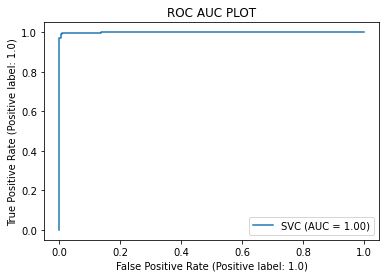

In [58]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

AUC score is 100%

In [59]:
original=np.array(y_test)
predicted=np.array(gbpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,1.0,1.0
...,...,...
459,0.0,0.0
460,0.0,0.0
461,0.0,0.0
462,1.0,1.0


# SAVING BEST MODEL

In [60]:
import joblib
joblib.dump(svc,'svcfile.obj')

['svcfile.obj']